In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import json
import requests
import gmaps
import os
import sys

# Import API key
sys.path.insert(0, "/Users/ianmacmoore/Desktop/ClassHomework/keys")
from api_keys import g_key
gmaps.configure(api_key=g_key)
g_key

# define current date string to append to the names of output files...
import datetime  
def _getToday(): return datetime.date.today().strftime("%Y%m%d")   

In [2]:
#Get main data from csv

historyMN_df = pd.read_csv("../Output_Data/COV_Tracking_MN_History_data_20200422.csv")
historyMN_df.head()

,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase
0,20200421,MN,2567,45130,1254.0,2020-04-21T20:00:00Z,160.0,629.0,47697,17.0,27.0,750.0,97.0,847.0
1,20200420,MN,2470,44380,1202.0,2020-04-20T20:00:00Z,143.0,602.0,46850,9.0,28.0,1020.0,114.0,1134.0
2,20200419,MN,2356,43360,1160.0,2020-04-19T20:00:00Z,134.0,574.0,45716,13.0,13.0,1305.0,143.0,1448.0
3,20200418,MN,2213,42055,1118.0,2020-04-18T20:00:00Z,121.0,561.0,44268,10.0,43.0,1073.0,142.0,1215.0
4,20200417,MN,2071,40982,1066.0,2020-04-17T20:00:00Z,111.0,518.0,43053,17.0,43.0,1219.0,159.0,1378.0


In [5]:
historyMN_df['Date'] = historyMN_df['Date'].astype(str)
historyMN_df['Date'] = pd.to_datetime(historyMN_df['Date'],yearfirst=True)
historyMN_df.sort_values('Date',inplace=True)
historyMN_df


,Date,State,Positive,Negative,Recovered,Date_Checked,Death,Hospitalized,Total_Test_Results,Death_Increase,Hospitalized_Increase,Negative_Increase,Positive_Increase,Total_Test_Results_Increase,Growth Factor
46,2020-03-06,MN,0,36,NaN,2020-03-06T21:00:00Z,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,
45,2020-03-07,MN,1,48,NaN,2020-03-07T21:00:00Z,NaN,NaN,49,0.0,0.0,12.0,1.0,13.0,
44,2020-03-08,MN,1,48,NaN,2020-03-08T20:00:00Z,NaN,NaN,49,0.0,0.0,0.0,0.0,0.0,
43,2020-03-09,MN,2,80,NaN,2020-03-09T20:00:00Z,NaN,NaN,82,0.0,0.0,32.0,1.0,33.0,
42,2020-03-10,MN,3,132,NaN,2020-03-10T20:00:00Z,NaN,NaN,135,0.0,0.0,52.0,1.0,53.0,
41,2020-03-11,MN,5,217,NaN,2020-03-11T20:00:00Z,NaN,NaN,222,0.0,0.0,85.0,2.0,87.0,
40,2020-03-12,MN,9,307,NaN,2020-03-12T20:00:00Z,NaN,NaN,316,0.0,0.0,90.0,4.0,94.0,
39,2020-03-13,MN,14,541,NaN,2020-03-13T20:00:00Z,NaN,NaN,555,0.0,0.0,234.0,5.0,239.0,
38,2020-03-14,MN,21,847,NaN,2020-03-14T20:00:00Z,NaN,NaN,868,0.0,0.0,306.0,7.0,313.0,
37,2020-03-15,MN,35,1387,NaN,2020-03-15T20:00:00Z,NaN,NaN,1422,0.0,0.0,540.0,14.0,554.0,


In [31]:
#historyMN_df.reset_index(inplace = True)
#historyMN_df.dropna(how='any',inplace=True)
#historyMN_df
date_positive_df = historyMN_df.loc[:,['Date', 'Positive_Increase','Death_Increase','Total_Test_Results_Increase']]
date_positive_df.set_index('Date', inplace=True)
date_positive_df.dropna(inplace=True)
date_positive_df.head()


,Positive_Increase,Death_Increase,Total_Test_Results_Increase
Date,,,
2020-03-07,1.0,0.0,13.0
2020-03-08,0.0,0.0,0.0
2020-03-09,1.0,0.0,33.0
2020-03-10,1.0,0.0,53.0
2020-03-11,2.0,0.0,87.0


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'People')

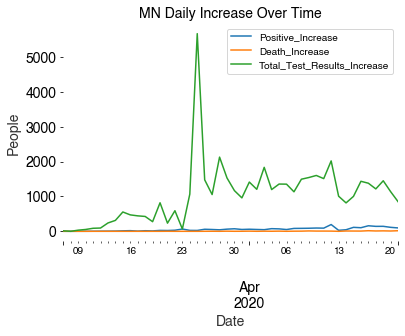

In [42]:

date_positive_df.plot()
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.rc('font',family='Helvetica',size=10) # work in standard sans-serif
plt.rc('mathtext',fontset='stixsans')     # with math from www.stixfonts.org

# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
plt.title("MN Daily Increase Over Time", fontsize=14)
plt.xlabel("Date", fontsize=14, alpha=0.8)
plt.ylabel("People", fontsize=14, alpha=0.8)

#marker_style = dict(color='tab:blue', linestyle=':', marker='o',
#                    markersize=1, markerfacecoloralt='tab:red') **marker_style

# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
#plt.savefig("Output_Data/COV.png", bbox_inches="tight")  

In [10]:
date_positive_df.rolling(5).std()

,Positive_Increase
Date,
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN
2020-03-11,0.707107
2020-03-12,1.516575
2020-03-13,1.816590
2020-03-14,2.387467
2020-03-15,4.615192


With it working for MN, bring in other States

In [43]:
statesToRead = ["MI","CO","MN"]

for state in statesToRead:
    StateHistoryFile = "%s_%s.%s" % (f"Output_Data/COV_Tracking_{state}_History_data", _getToday() ,"csv")
    StateHistory_df = pd.read_csv(StateHistoryFile)
    #StateHistory_df.head()
    stateHistory_df['Date'] = stateHistory_df['Date'].astype(str)
    stateHistory_df['Date'] = pd.to_datetime(stateHistoryMN_df['Date'],yearfirst=True)
    stateHistory_df.sort_values('Date',inplace=True)
    stateHistory_df.dropna(how='any',inplace=True)

    date_positive_df = stateHistory_df.loc[:,['Date', 'Positive_Increase','Death_Increase','Total_Test_Results_Increase']]
    date_positive_df.set_index('Date', inplace=True)
    date_positive_df.dropna(inplace=True)
    date_positive_df.plot()
    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)   
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)   

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 

    plt.rc('font',family='Helvetica',size=10) # work in standard sans-serif
    plt.rc('mathtext',fontset='stixsans')     # with math from www.stixfonts.org

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14)  
    plt.title("MN Daily Increase Over Time", fontsize=14)
    plt.xlabel("Date", fontsize=14, alpha=0.8)
    plt.ylabel("People", fontsize=14, alpha=0.8)
    plt.show()
    
    
    

FileNotFoundError: [Errno 2] File Output_Data/COV_Tracking_MI_History_data_20200423.csv does not exist: 'Output_Data/COV_Tracking_MI_History_data_20200423.csv'